In [ ]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [2]:
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        images = batch[b'data']
        labels = batch[b'labels']
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        images = images.astype('float32') / 255.0
        labels = np.array(labels)
        return images, labels

train_images = []
train_labels = []

for i in range (5):
    file_path = f"D:/Cool Yeah/Semester VI/IF3270 - Pembejalaran Mesin/Tubes 2/cifar-10-python/cifar-10-batches-py/data_batch_{i+1}"
    images, labels = load_cifar10_batch(file_path)
    train_images.append(images)
    train_labels.append(labels)

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

x_test, y_test = load_cifar10_batch("D:/Cool Yeah/Semester VI/IF3270 - Pembejalaran Mesin/Tubes 2/cifar-10-python/cifar-10-batches-py/test_batch")

In [3]:
x_train, x_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

### Variasi 1

<p>
Spesifikasi:<br/>
2 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [ ]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3391 - loss: 1.8309 - val_accuracy: 0.5120 - val_loss: 1.3930
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5273 - loss: 1.3387 - val_accuracy: 0.5783 - val_loss: 1.2060
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5942 - loss: 1.1581 - val_accuracy: 0.6071 - val_loss: 1.1234
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6215 - loss: 1.0850 - val_accuracy: 0.6199 - val_loss: 1.1117
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6497 - loss: 1.0064 - val_accuracy: 0.6413 - val_loss: 1.0237
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6690 - loss: 0.9445 - val_accuracy: 0.6593 - val_loss: 0.9938
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6882 - loss: 0.8940 - val_accuracy: 0.6600 - val_loss: 0.9896
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7001 - loss: 0.8551 - val_accurac

### Variasi 2

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [5]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3340 - loss: 1.8132 - val_accuracy: 0.5343 - val_loss: 1.3305
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5440 - loss: 1.2904 - val_accuracy: 0.6017 - val_loss: 1.1499
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6024 - loss: 1.1221 - val_accuracy: 0.6252 - val_loss: 1.0845
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6497 - loss: 1.0123 - val_accuracy: 0.6585 - val_loss: 1.0047
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6750 - loss: 0.9323 - val_accuracy: 0.6599 - val_loss: 0.9796
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6947 - loss: 0.8838 - val_accuracy: 0.6729 - val_loss: 0.9597
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7161 - loss: 0.8221 - val_accuracy: 0.6903 - val_loss: 0.9169
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7349 - loss: 0.7648 - val_accuracy: 0.

### Variasi 3

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 128 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [6]:
model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3558 - loss: 1.7643 - val_accuracy: 0.5422 - val_loss: 1.2915
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5791 - loss: 1.1973 - val_accuracy: 0.5973 - val_loss: 1.1605
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6467 - loss: 1.0225 - val_accuracy: 0.6623 - val_loss: 0.9916
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6730 - loss: 0.9386 - val_accuracy: 0.6759 - val_loss: 0.9454
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.7142 - loss: 0.8382 - val_accuracy: 0.6775 - val_loss: 0.9366
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.7321 - loss: 0.7733 - val_accuracy: 0.6878 - val_loss: 0.9132
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.7509 - loss: 0.7176 - val_accuracy: 0.6847 - val_loss: 0.9282
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7688 - loss: 0.6636 - val_

In [7]:
def evaluate_model(model, x_test, y_test, history):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    print(classification_report(y_test, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluasi Model 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1000
           1       0.77      0.84      0.80      1000
           2       0.53      0.61      0.57      1000
           3       0.49      0.50      0.49      1000
           4       0.67      0.54      0.60      1000
           5       0.55      0.65      0.60      1000
           6       0.78      0.72      0.75      1000
           7       0.76      0.72      0.74      1000
           8       0.81      0.76      0.79      1000
           9       0.79      0.71      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

Macro F1-score: 0.6791


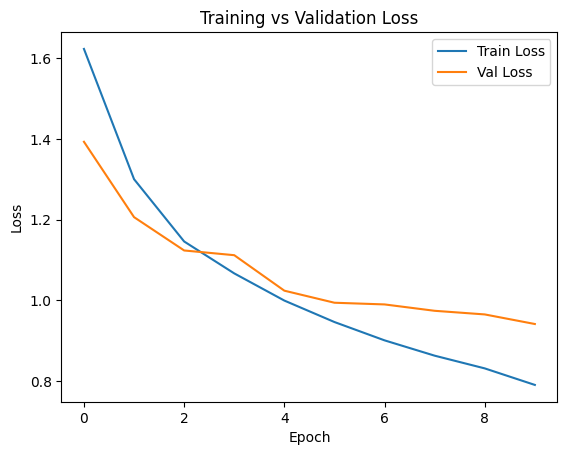

0.679119157967853

In [8]:
evaluate_model(model_1, x_test, y_test, history_1)

### Evaluasi Model 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.64      0.71      1000
           1       0.85      0.74      0.80      1000
           2       0.70      0.45      0.55      1000
           3       0.51      0.40      0.45      1000
           4       0.54      0.72      0.62      1000
           5       0.49      0.73      0.59      1000
           6       0.74      0.76      0.75      1000
           7       0.76      0.72      0.74      1000
           8       0.83      0.75      0.79      1000
           9       0.69      0.83      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

Macro F1-score: 0.6755


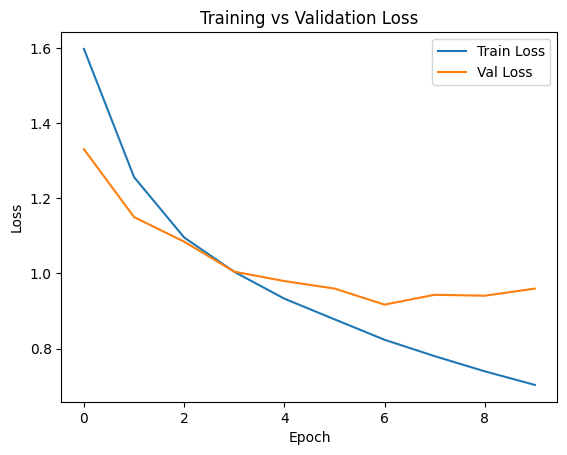

0.6754838698416396

In [9]:
evaluate_model(model_2, x_test, y_test, history_2)

### Evaluasi Model 3

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.85      0.80      0.82      1000
           2       0.66      0.53      0.58      1000
           3       0.50      0.52      0.51      1000
           4       0.57      0.72      0.64      1000
           5       0.62      0.60      0.61      1000
           6       0.79      0.76      0.77      1000
           7       0.77      0.73      0.75      1000
           8       0.82      0.80      0.81      1000
           9       0.78      0.81      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

Macro F1-score: 0.7021


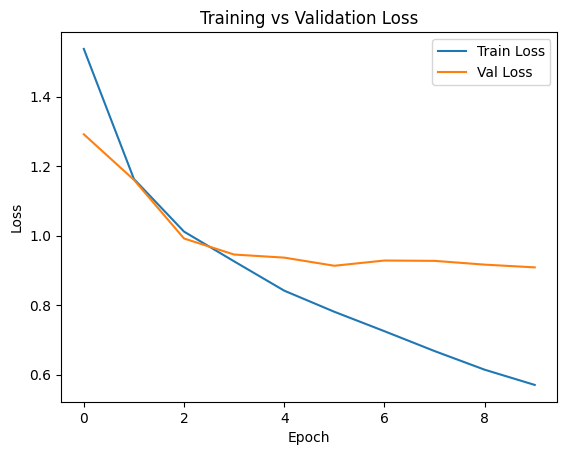

0.7021442079811965

In [10]:
evaluate_model(model_3, x_test, y_test, history_3)